# exercise 3: ligand RMSD
RMSD: Root Mean Square Deviation

In [1]:
import numpy as np
from rdkit import Chem

In [2]:
def cal_rmsd(dock_ligand_file, ref_file):
    m = Chem.MolFromPDBFile(dock_ligand_file)
    m_ref = Chem.MolFromPDBFile(ref_file)

    smarts = Chem.MolToSmarts(m_ref)

    patt = Chem.MolFromSmarts(smarts)
    cs_list = m.GetSubstructMatches(patt, uniquify=False)
    cs_ref = m_ref.GetSubstructMatch(patt)

    num_atoms = len(cs_ref)
    conformers = m.GetConformers()
    conformer_ref = m_ref.GetConformer()
    num_conf = len(conformers)
    num_hatoms = m.GetNumHeavyAtoms()
    rmsd_list = list()
    for i_conf in range(num_conf):
        conformer = conformers[i_conf]
        rmsd_min = 99.999
        for cs in cs_list:
            tmp = 0.0
            for i in range(num_atoms):
                idx = cs[i]
                idx_ref = cs_ref[i]
                atom = m.GetAtomWithIdx(idx)
                if atom.GetSymbol() == 'H':
                    continue
                p = conformer.GetAtomPosition(idx)
                p_ref = conformer_ref.GetAtomPosition(idx_ref)
                pos = np.array([p.x, p.y, p.z])
                pos_ref = np.array([p_ref.x, p_ref.y, p_ref.z])
                tmp += ((pos-pos_ref)**2).sum()
            rmsd = np.sqrt(tmp/num_hatoms)
            if rmsd < rmsd_min:
                rmsd_min = rmsd
        rmsd_list += [rmsd_min]
    return rmsd_list

In [3]:
dock_ligand_file = 'pdb/dock_M855.pdb'
ref_file = 'pdb/3HMMA_855.pdb'

In [4]:
m_ref = Chem.MolFromPDBFile(ref_file)

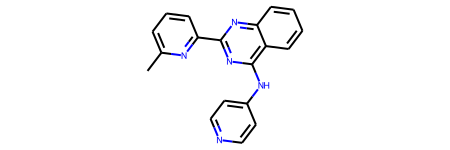

In [5]:
m_ref.RemoveAllConformers()
m_ref

In [6]:
rmsd_list = cal_rmsd(dock_ligand_file, ref_file)
for i_conf, rmsd in enumerate(rmsd_list):
    print(i_conf, rmsd)

0 0.22566632816321225
1 5.786131738908129
2 1.806381719534016
3 4.901281584102944
4 6.7974298451694235
5 6.8750292090288605
6 6.387599366480861
7 6.642500435955324
8 7.282460461615977
9 8.188844006736645


In [7]:
m = Chem.MolFromPDBFile(dock_ligand_file)
m_ref = Chem.MolFromPDBFile(ref_file)

smarts = Chem.MolToSmarts(m_ref)
patt = Chem.MolFromSmarts(smarts)
cs_list = m.GetSubstructMatches(patt, uniquify=False)
print(cs_list)

((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 22, 21, 20, 19))
